In [3]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl').transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaah anybody,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh screeching,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)

# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian,'->')
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

{'ali': [('like', 126), ('know', 65), ('just', 64), ('don', 61), ('shit', 34), ('gonna', 28), ('ok', 26), ('lot', 24), ('gotta', 21), ('oh', 21), ('wanna', 21), ('husband', 20), ('time', 19), ('got', 19), ('right', 19), ('women', 19), ('cause', 18), ('day', 17), ('people', 16), ('pregnant', 15), ('need', 14), ('god', 14), ('oh god', 14), ('tell', 13), ('yeah', 13), ('don know', 12), ('dude', 12), ('work', 12), ('really', 12), ('like oh', 11)], 'anthony': [('like', 50), ('know', 39), ('don', 38), ('joke', 35), ('got', 34), ('said', 31), ('ve', 28), ('anthony', 27), ('day', 26), ('say', 26), ('just', 26), ('people', 23), ('guys', 22), ('tell', 19), ('grandma', 19), ('right', 18), ('thing', 18), ('think', 17), ('time', 17), ('school', 16), ('baby', 16), ('good', 16), ('did', 16), ('yeah', 16), ('dad', 16), ('okay', 15), ('jokes', 15), ('gonna', 15), ('hate', 14), ('shark', 14)], 'bill': [('like', 200), ('just', 149), ('right', 131), ('know', 99), ('don', 95), ('gonna', 77), ('got', 72), (

In [27]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
# print(words)

# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('just', 12),
 ('don', 12),
 ('right', 12),
 ('people', 12),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('say', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('really', 6),
 ('ve', 6),
 ('fucking', 6),
 ('didn', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('don know', 5),
 ('thing', 5),
 ('fuck', 5),
 ('want', 5),
 ('guy', 5),
 ('good', 4),
 ('did', 4),
 ('ll', 4),
 ('dude', 3),
 ('dad', 3),
 ('come', 3),
 ('little', 3),
 ('old', 3),
 ('girl', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('way', 3),
 ('mean', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('god', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('let', 2),
 ('make', 2),
 ('love', 2),
 ('laughter', 2),
 ('applause', 2),
 ('mom', 2),
 ('hey', 2),
 ('look', 2),
 ('white', 2),
 ('goes', 2),
 ('real', 2),
 ('kids', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('oh god', 1),
 ('work', 1),
 ('like oh', 1),
 ('an

In [28]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'just',
 'don',
 'right',
 'people',
 'got',
 'gonna',
 'time',
 'say',
 'think',
 'oh',
 'yeah',
 'said']

In [41]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
data_stop.to_pickle("dtm_stop.pkl")

In [60]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="cool",
               max_font_size=150, random_state=42)

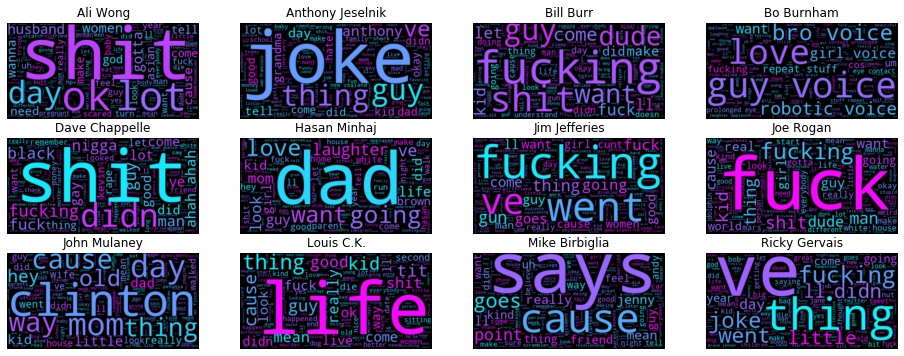

In [61]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()